In [7]:
#Speicherorte: 

folderPath = "/Users/fabian/Library/Mobile Documents/com~apple~CloudDocs/BIDS/03_Datenmanagement/Project X /GitHub_V1/Projekt-ML-Modelierung/"      # Fabian
# folderPath = "https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/"                                             # GITFolder



# #Benoetigte Libraries werden importiert
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys                                                                                       #os.path bietet Funktionen zur Manipulation von Pfadnamen https://docs.python.org/3/library/os.path.html
import seaborn as sns
import sqlite3


#Aktuelle Python Version wird ausgegeben----------------------------------------
print("Python Version:", sys.version)


#Pfad zum GitHub Repository und Verzeichnisnamen--------------------------------
synthea_url = "https://github.com/MichaelKru92/Projekt-ML-Modelierung"
synthea_dir = "Projekt-ML-Modelierung"
local_Directory = "/Users/fabian/Library/Mobile Documents/com~apple~CloudDocs/BIDS/03_Datenmanagement/Project X /GitHub_V1/Projekt-ML-Modelierung/"

if not os.path.exists(synthea_dir):                                                              #Sofern der Pfad zum Verzeichnis synthea_data noch nicht existiert
    !git clone {synthea_url}                                                                     #Shell command: git kopiere das Repository synthea_url
    print(f"Repository '{synthea_url}' erfolgreich geklont.")
else:
    print(f"Verzeichnis '{synthea_dir}' existiert bereits. Kein erneutes Klonen erforderlich.")


#Inhalte des Verzeichnis inklusiver versteckter Dateien-------------------------
!ls -lah synthea



#Anlegen einer neuen sqlite Datenbank-------------------------------------------
if os.path.exists("synthea.db"):                                                                 #Sofern die Datei synthea.db bereits existiert
    os.remove("synthea.db")                                                                       #Datei wird geloescht
db_name = "synthea.db"                                                                            #DB Dateiname wird vergeben
conn = sqlite3.connect(db_name)                                                                   #Verbindung zur DB Datei wird hergestellt
cur = conn.cursor()                                                                               #Ueber dise Verbindung wird auf die DB ein Cursor gesetzt


Python Version: 3.13.0 (v3.13.0:60403a5409f, Oct  7 2024, 00:37:40) [Clang 15.0.0 (clang-1500.3.9.4)]
Verzeichnis 'Projekt-ML-Modelierung' existiert bereits. Kein erneutes Klonen erforderlich.
ls: synthea: No such file or directory


In [113]:
# Alle Tabellen Laden

CSV_TABLES = ["careplans.csv", "conditions.csv", "devices.csv", "disease.csv", "encounters.csv", "imaging_studies.csv", "immunizations.csv",
              "medications.csv", "observations.csv", "organizations.csv", "patients.csv", "payer_transitions.csv", "payers.csv", "procedures.csv",
              "providers.csv", "supplies.csv"]

counter = 0
while counter < len(CSV_TABLES):
    current_table = pd.read_csv(folderPath + CSV_TABLES[counter])
    print("Tabelle: ", CSV_TABLES[counter], " mit den Attributen: ", current_table.columns) 
    counter += 1

print("Alle Tabellennamen und deren Attribute wurden erfolgreich ausgegeben .")






Tabelle:  careplans.csv  mit den Attributen:  Index(['Id', 'START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')
Tabelle:  conditions.csv  mit den Attributen:  Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')
Tabelle:  devices.csv  mit den Attributen:  Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'UDI'], dtype='object')
Tabelle:  disease.csv  mit den Attributen:  Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')
Tabelle:  encounters.csv  mit den Attributen:  Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')
Tabelle:  imaging_studies.csv  mit den Attributen:  Index(['Id', 'DATE', 'PATIENT', 'ENCOUNTER', 'BO

In [114]:
# CSV Daten in SQL Datenbank laden---------------------------------------------
conn = sqlite3.connect("synthea.db")  
cur = conn.cursor()                                               
counter = 0 

while counter < len(CSV_TABLES):
    current_table = pd.read_csv(folderPath + CSV_TABLES[counter])
    current_table.to_sql(CSV_TABLES[counter].split(".")[0], conn, if_exists='replace', index = False)
    counter += 1

print("Alle Tabellen wurden erfolgreich in die Datenbank geladen.")




Alle Tabellen wurden erfolgreich in die Datenbank geladen.


In [122]:
# Test der Datenbankverbindung-------------------------------------------------

# SQL-Abfrage erstellen
query = "SELECT * from careplans"

# SQL-Abfrage ausführen
cur.execute(query)


# Ergebnisse abrufen
results = cur.fetchall()


# Ergebnisse verarbeiten (zum Beispiel ausdrucken)
for row in results:
    print(row)




('b066696b-4a2f-ec29-b018-bcf7464d020c', '1943-02-15', None, '3575b903-dbd0-1d55-6146-9e8aa4ed52a5', 'fd59905a-4ec8-62a6-d45d-d2a458d60111', 384758001, 'Self-care interventions (procedure)', None, None)
('8a34101d-6503-4181-6d2d-d316e5f71de0', '2010-01-20', None, 'aff157cc-b6d3-412b-ccbe-bfd5fac1c2d5', 'be256df1-75cb-cbf7-0109-e0e1ae2c6348', 443402002, 'Lifestyle education regarding hypertension', 59621000.0, 'Hypertension')
('b70e996d-ad15-b34b-d528-e8150d56379d', '2000-01-07', None, '9bbbcada-7a45-92f0-6ae6-d197bcefc0d4', '1b85d074-6a01-7607-27b2-f1e9f6bf305d', 698360004, 'Diabetes self management plan', 44054006.0, 'Diabetes')
('a91f64e4-037e-fff5-6ed0-28c3c0d04ec2', '2000-01-07', None, '9bbbcada-7a45-92f0-6ae6-d197bcefc0d4', 'a8ea7228-41bd-66d9-12f6-912d0e2dfbe4', 443402002, 'Lifestyle education regarding hypertension', 59621000.0, 'Hypertension')
('cfabbc6f-5086-7399-caa5-1da31e629661', '2019-01-30', '2019-05-27', '3575b903-dbd0-1d55-6146-9e8aa4ed52a5', 'cd0f83e5-1e70-75ec-1be9-b2

In [123]:
# Funktionierende SQL Abfragen

# SQL-Abfrage erstellen
query = "SELECT Description, count(Description) from disease group by Description order by count(Description) desc"

# SQL-Abfrage ausführen
cur.execute(query)


# Ergebnisse abrufen
results = cur.fetchall()


# Ergebnisse verarbeiten (zum Beispiel ausdrucken)
for row in results:
    print(row)

# Balkendirgram erstellen


('Allergy to grass pollen', 8)
('Dander (animal) allergy', 7)
('Allergy to tree pollen', 7)
('Allergy to mould', 7)
('House dust mite allergy', 5)
('Allergy to peanuts', 4)
('Allergy to wheat', 3)
('Allergy to bee venom', 3)
('Latex allergy', 2)
('Allergy to dairy product', 2)
('Shellfish allergy', 1)
('Allergy to nut', 1)
('Allergy to eggs', 1)


<Axes: title={'center': 'Weiblich Allergie Verteilung'}, xlabel='Disease'>

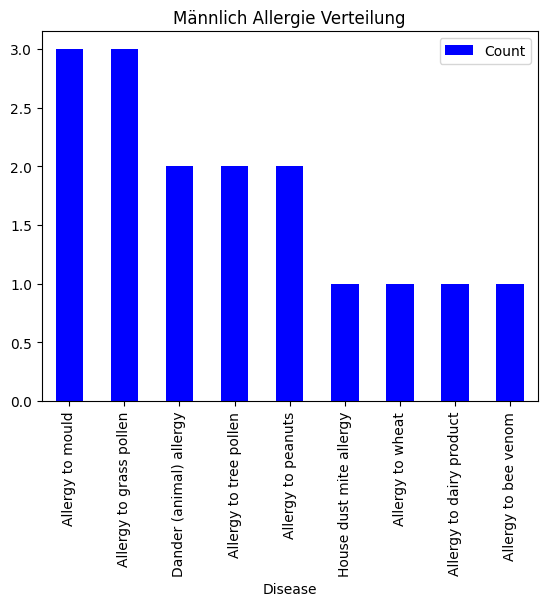

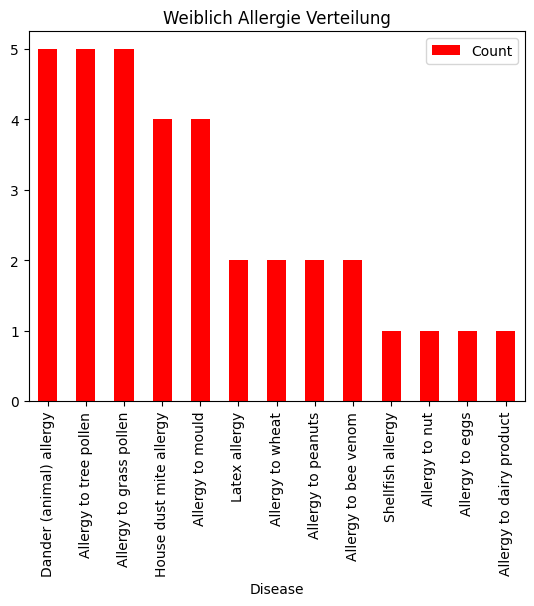

In [125]:
# Allergie Verteilung im Geschlechtervergleich

# SQL-Abfrage erstellen
query1 = "SELECT Description, count(Description) from disease, patients where disease.patient = patients.id and patients.gender = 'M' group by Description order by count(Description) desc"
query2 = "SELECT Description, count(Description) from disease, patients where disease.patient = patients.id and patients.gender = 'F' group by Description order by count(Description) desc"

# SQL-Abfrage ausführen
cur.execute(query1)
result1 = cur.fetchall()

# Ergebnisse abrufen
cur.execute(query2)
result2 = cur.fetchall()

# Ergebnisse verarbeiten (zum Beispiel ausdrucken)
#for row in result1:
#    print(row)

#for row in result2:
#    print(row)

# Balkendirgram erstellen
df1m = pd.DataFrame(result1, columns=['Disease', 'Count'])
df2f = pd.DataFrame(result2, columns=['Disease', 'Count'])
df1m.plot(kind='bar', x='Disease', y='Count', color='blue', title='Männlich Allergie Verteilung')
df2f.plot(kind='bar', x='Disease', y='Count', color='red', title='Weiblich Allergie Verteilung')

# gruppiertes Balkendiagramm erstellen


<Axes: title={'center': 'Verteilung der Versorgungen'}, xlabel='Disease'>

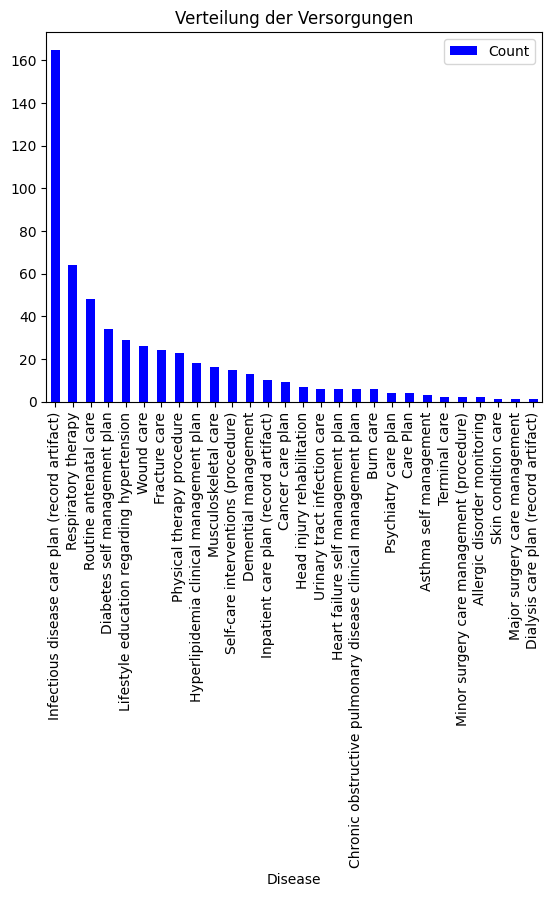

In [127]:
# Allergie Verteilung im Geschlechtervergleich

# SQL-Abfrage erstellen
query1 = "SELECT careplans.Description, count(careplans.Description) from careplans group by careplans.Description order by count(careplans.Description) desc"

# SQL-Abfrage ausführen
cur.execute(query1)
result1 = cur.fetchall()


# Ergebnisse verarbeiten (zum Beispiel ausdrucken)
#for row in result1:
#    print(row)


# Balkendirgram erstellen
df1m = pd.DataFrame(result1, columns=['Disease', 'Count'])

df1m.plot(kind='bar', x='Disease', y='Count', color='blue', title='Verteilung der Versorgungen')



[('Medicare', 2999, 275640.3), ('Blue Cross Blue Shield', 1007, 105159.18), ('NO_INSURANCE', 897, 100407.19), ('Medicaid', 781, 93020.12), ('Aetna', 654, 76255.11), ('Humana', 411, 48951.159999999996), ('UnitedHealthcare', 376, 44068.869999999995), ('Cigna Health', 320, 37042.59), ('Anthem', 167, 21569.72), ('Dual Eligible', 156, 17203.77)]
('Medicare', 2999, 275640.3)
('Blue Cross Blue Shield', 1007, 105159.18)
('NO_INSURANCE', 897, 100407.19)
('Medicaid', 781, 93020.12)
('Aetna', 654, 76255.11)
('Humana', 411, 48951.159999999996)
('UnitedHealthcare', 376, 44068.869999999995)
('Cigna Health', 320, 37042.59)
('Anthem', 167, 21569.72)
('Dual Eligible', 156, 17203.77)


<Axes: title={'center': 'Verteilung der Versorgungen'}, xlabel='Insuarence'>

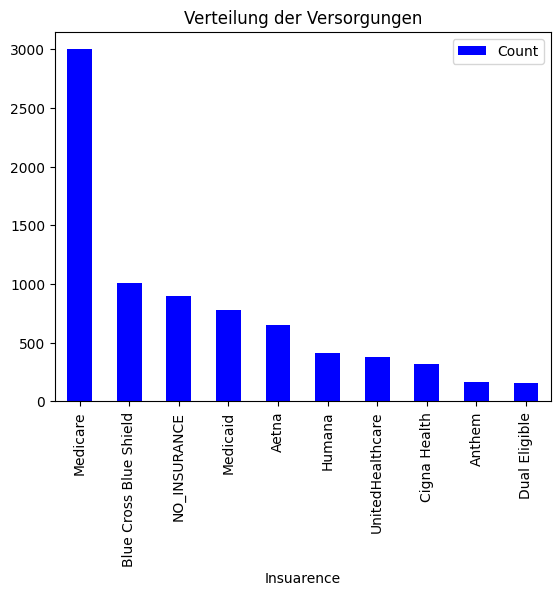

In [141]:
# Allergie Verteilung im Geschlechtervergleich

# SQL-Abfrage erstellen
query1 = "SELECT payers.name, count(encounters.id), sum(encounters.TOTAL_CLAIM_COST) from payers, encounters where payers.id = encounters.payer group by payers.name order by sum(encounters.TOTAL_CLAIM_COST) desc"

# SQL-Abfrage ausführen
cur.execute(query1)
result1 = cur.fetchall()

print(result1)


# Ergebnisse verarbeiten (zum Beispiel ausdrucken)
for row in result1:
    print(row)


# Balkendirgram erstellen
df1m = pd.DataFrame(result1, columns=['Insuarence', 'Count', 'Total Cost'])

df1m.plot(kind='bar', x='Insuarence', y='Count', color='blue', title='Verteilung der Versorgungen')


In [118]:
#Zwischenspeicher: 





careplans_df = pd.read_csv(folderPath + "careplans" + ".csv")
conditions_df = pd.read_csv(folderPath + "conditions" + ".csv")
devices_df = pd.read_csv(folderPath + "devices" + ".csv")
disease_df = pd.read_csv(folderPath + "disease" + ".csv")
encounters_df = pd.read_csv(folderPath + "encounters" + ".csv")
imaging_studies_df = pd.read_csv(folderPath + "imaging_studies" + ".csv")
immunizations_df = pd.read_csv(folderPath + "immunizations" + ".csv")
medications_df = pd.read_csv(folderPath + "medications" + ".csv")
observations_df = pd.read_csv(folderPath + "observations" + ".csv")   
organizations_df = pd.read_csv(folderPath + "organizations" + ".csv")
patients_df = pd.read_csv(folderPath + "patients" + ".csv")
payer_transitions_df = pd.read_csv(folderPath + "payer_transitions" + ".csv")
payers_df = pd.read_csv(folderPath + "payers" + ".csv")
procedures_df = pd.read_csv(folderPath + "procedures" + ".csv")
providers_df = pd.read_csv(folderPath + "providers" + ".csv")
supplies_df = pd.read_csv(folderPath + "supplies" + ".csv")

print("careplans_df, anzahl Zeilen: ", len(careplans_df), " mit den Attributen", careplans_df.columns)
print("careplans_df, anzahl Zeilen: ", len(careplans_df), " mit den Attributen", careplans_df.columns)
print("careplans_df, anzahl Zeilen: ", len(careplans_df), " mit den Attributen", careplans_df.columns)
print


careplans_df, anzahl Zeilen:  545  mit den Attributen Index(['Id', 'START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')
careplans_df, anzahl Zeilen:  545  mit den Attributen Index(['Id', 'START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')
careplans_df, anzahl Zeilen:  545  mit den Attributen Index(['Id', 'START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

Index(['start', 'stop', 'patient', 'encounter', 'code', 'description'], dtype='object')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Allergy to grass pollen'),
  Text(1, 0, 'Allergy to mould'),
  Text(2, 0, 'Dander (animal) allergy'),
  Text(3, 0, 'Allergy to tree pollen'),
  Text(4, 0, 'House dust mite allergy'),
  Text(5, 0, 'Allergy to peanuts'),
  Text(6, 0, 'Allergy to bee venom'),
  Text(7, 0, 'Allergy to wheat'),
  Text(8, 0, 'Allergy to dairy product'),
  Text(9, 0, 'Latex allergy'),
  Text(10, 0, 'Shellfish allergy'),
  Text(11, 0, 'Allergy to nut'),
  Text(12, 0, 'Allergy to eggs')])

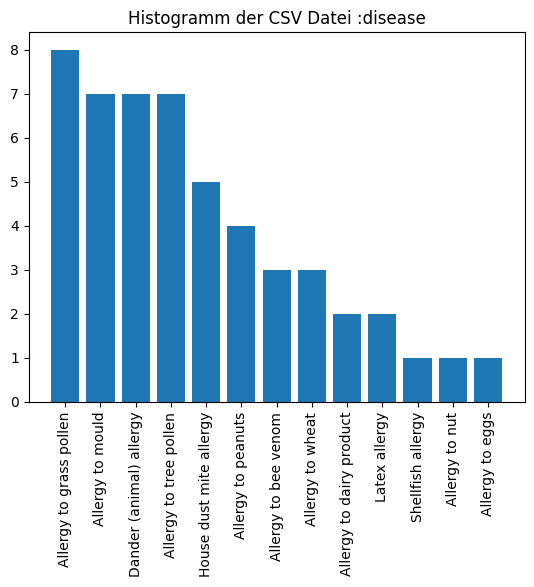

In [119]:
# Was soll untersucht werden: careplans, conditions, allergies, medications, patients, encounters, procedures
NameDatei = "disease" #Name der Datei, die untersucht werden soll

#Exploration der allergies.csv Dateien als pandas DataFrame
allergies_df = pd.read_csv(folderPath + NameDatei + ".csv")

#print(allergies_df.iloc[2:5])




allergies_df.columns = allergies_df.columns.str.lower()
print(allergies_df.columns)
#print(allergies_df.columns)
#print('Länge des Datensatzes mit dem Namen ' + NameDatei + ' : ' + str(len(allergies_df)))
#print(allergies_df.isnull().sum())
#print(allergies_df.dtypes)
#pie_allergies = allergies_df["description"].value_counts().reset_index(name="counts")
#plt.pie(pie_allergies["counts"], labels = pie_allergies["description"])
#plt.hist(allergies_df['description'].dropna())
plt.title("Histogramm der CSV Datei :" + NameDatei)
plt_allergies = allergies_df["description"].value_counts().reset_index(name="counts")
#print(plt_allergies)
plt.bar(plt_allergies["description"], plt_allergies["counts"])
plt.xticks(rotation = 90)
#plt.xlabel('Beschreibung')
#plt.ylabel('Häufigkeit')
#plt.show()

#plt.title("Top 10: Allergien")

#plt.show()

                                     Id       START        STOP  \
2  b70e996d-ad15-b34b-d528-e8150d56379d  2000-01-07         NaN   
3  a91f64e4-037e-fff5-6ed0-28c3c0d04ec2  2000-01-07         NaN   
4  cfabbc6f-5086-7399-caa5-1da31e629661  2019-01-30  2019-05-27   

                                PATIENT                             ENCOUNTER  \
2  9bbbcada-7a45-92f0-6ae6-d197bcefc0d4  1b85d074-6a01-7607-27b2-f1e9f6bf305d   
3  9bbbcada-7a45-92f0-6ae6-d197bcefc0d4  a8ea7228-41bd-66d9-12f6-912d0e2dfbe4   
4  3575b903-dbd0-1d55-6146-9e8aa4ed52a5  cd0f83e5-1e70-75ec-1be9-b254e2589e49   

        CODE                                 DESCRIPTION  REASONCODE  \
2  698360004               Diabetes self management plan  44054006.0   
3  443402002  Lifestyle education regarding hypertension  59621000.0   
4   53950000                         Respiratory therapy  10509002.0   

             REASONDESCRIPTION  
2                     Diabetes  
3                 Hypertension  
4  Acute bronchiti

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Infectious disease care plan (record artifact)'),
  Text(1, 0, 'Respiratory therapy'),
  Text(2, 0, 'Routine antenatal care'),
  Text(3, 0, 'Diabetes self management plan'),
  Text(4, 0, 'Lifestyle education regarding hypertension'),
  Text(5, 0, 'Wound care'),
  Text(6, 0, 'Fracture care'),
  Text(7, 0, 'Physical therapy procedure'),
  Text(8, 0, 'Hyperlipidemia clinical management plan'),
  Text(9, 0, 'Musculoskeletal care'),
  Text(10, 0, 'Self-care interventions (procedure)'),
  Text(11, 0, 'Demential management'),
  Text(12, 0, 'Inpatient care plan (record artifact)'),
  Text(13, 0, 'Cancer care plan'),
  Text(14, 0, 'Head injury rehabilitation'),
  Text(15, 0, 'Burn care'),
  Text(16, 0, 'Urinary tract infection care'),
  Text(17, 0, 'Heart failure self management plan'),
  Text(18, 0, 'Chronic obstructive pul

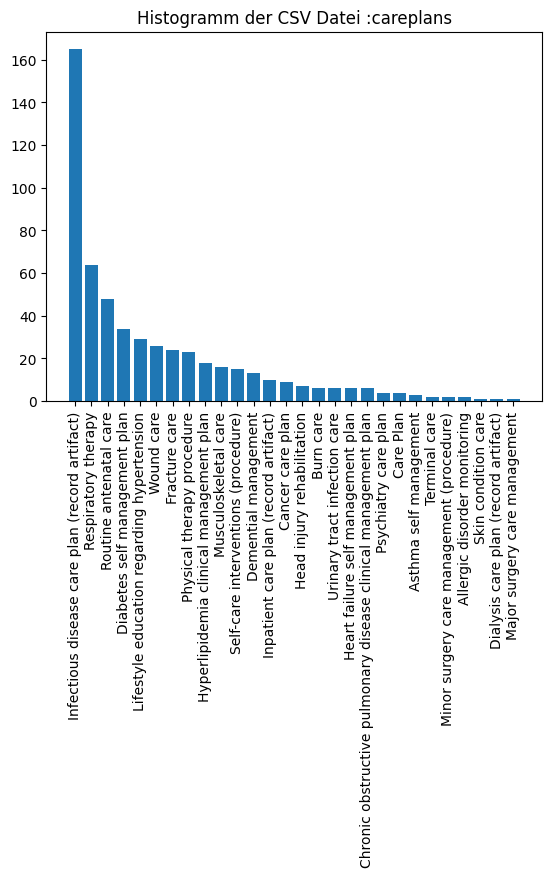

In [120]:
# Was soll untersucht werden: careplans, conditions, allergies, medications, patients, encounters, procedures
NameDatei = "careplans" #Name der Datei, die untersucht werden soll

#Exploration der allergies.csv Dateien als pandas DataFrame
source_df = pd.read_csv(folderPath + NameDatei + ".csv")

print(source_df.iloc[2:5])




source_df.columns = source_df.columns.str.lower()
#print(source_df.columns)
#print(source_df.columns)
#print('Länge des Datensatzes mit dem Namen ' + NameDatei + ' : ' + str(len(source_df)))
#print(source_df.isnull().sum())
#print(source_df.dtypes)
#pie_allergies = source_df["description"].value_counts().reset_index(name="counts")
#plt.pie(pie_allergies["counts"], labels = pie_allergies["description"])
#plt.hist(source_df['description'].dropna())
plt.title("Histogramm der CSV Datei :" + NameDatei)
plt_allergies = source_df["description"].value_counts().reset_index(name="counts")
#print(plt_allergies)
plt.bar(plt_allergies["description"], plt_allergies["counts"])
plt.xticks(rotation = 90)
#plt.xlabel('Beschreibung')
#plt.ylabel('Häufigkeit')
#plt.show()

#plt.title("Top 10: Allergien")

#plt.show()

In [121]:
a

NameError: name 'a' is not defined

In [ ]:
#Exploration der careplans.csv Dateien als pandas DataFrame
careplans_df = pd.read_csv("/Users/fabian/Library/Mobile Documents/com~apple~CloudDocs/BIDS/03_Datenmanagement/Project X /GitHub_V1/Projekt-ML-Modelierung/careplans.csv")
careplans_df.columns = careplans_df.columns.str.lower()
print(careplans_df.columns)
print(len(careplans_df))
print(careplans_df.isnull().sum())
print(careplans_df.dtypes)
print(careplans_df["reasoncode"])
pie_careplans = careplans_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_careplans["counts"], labels = pie_careplans["description"])
plt.title("Top 10: Careplans")
plt.show()
pie_diagnosis = careplans_df["reasondescription"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_diagnosis["counts"], labels = pie_diagnosis["reasondescription"])
plt.title("Top 10: Diagnosis")
plt.show()